In [19]:
### load the functions
load('Zsap.sage')
load('Gssp_sequence.sage')
### find these files on 
### https://github.com/jephianlin/publish

### Quickstart guide

In [20]:
### Gssp_sequence will return
### True or False
### (whether there is a Gssp sequence
###  starting from g and ending with a complete graph), 
### and a sequence of forces
g = graphs.PathGraph(5)
Gssp_sequence(g)

(True,
 [(1, ((1, 0), (0, 2))),
  (1, ((2, 0), (0, 3))),
  (1, ((2, 1), (1, 3))),
  (1, ((3, 0), (0, 4))),
  (1, ((0, 4), (4, 1))),
  (1, ((1, 4), (4, 2)))])

In [21]:
### If print_force=True
### then typeset the forces
g = graphs.PathGraph(5)
forces = Gssp_sequence(g, print_force=True)

Rule 1: {1,0} --> {0,2}
Rule 1: {2,0} --> {0,3}
Rule 1: {2,1} --> {1,3}
Rule 1: {3,0} --> {0,4}
Rule 1: {0,4} --> {4,1}
Rule 1: {1,4} --> {4,2}


### Example 3.4

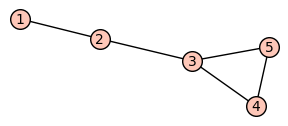

In [29]:
V = [1,2,3,4,5]
E = [(1,2), (2,3), (3,4), (4,5), (5,3)]
g = Graph([V,E])
g.show(figsize=[3,3])

In [30]:
forces = Gssp_sequence(g, print_force=True)

Rule 1: {2,1} --> {1,3}
Rule 1: {3,4} --> {4,2}
Rule 1: {3,2} --> {2,5}
Rule 1: {2,4} --> {4,1}
Rule 1: {3,1} --> {1,5}


### Example 3.16

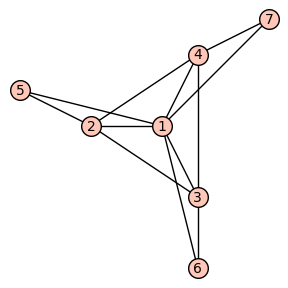

In [52]:
V = [1,2,3,4,5,6,7]
E = [(1,2), (2,5), (1,4), (4,7), (1,3), 
     (3,6), (2,3), (3,4), (2,4), (1,5), (1,6), (1,7)]
g = Graph([V,E])
pos = {1:[0,0], 2:[-1,0], 3:[0.5,-1], 4:[0.5,1], 
       5:[-2,0.5], 6:[0.5,-2], 7:[1.5,1.5]}
g.set_pos(pos)
g.show(figsize=[3,3])

In [57]:
var_a = {(i,j):var('a%s%s'%(i,j)) for i in range(1,8) for j in range(1,8)}
M = matrix([
    [-var_a[1,6], 0, 0, 0, 0, -var_a[1,7]],
    [var_a[3,6], -var_a[2,5], 0, 0, 0, 0],
    [0, -var_a[1,5], -var_a[1,7], 0, 0, 0],
    [0, 0, var_a[4,7], -var_a[3,6], 0, 0],
    [0, 0, 0, -var_a[1,6], -var_a[1,5], 0],
    [0, 0, 0, 0, -var_a[2,5], var_a[4,7]]
])
M

[-a16    0    0    0    0 -a17]
[ a36 -a25    0    0    0    0]
[   0 -a15 -a17    0    0    0]
[   0    0  a47 -a36    0    0]
[   0    0    0 -a16 -a15    0]
[   0    0    0    0 -a25  a47]

In [58]:
p = M.determinant()
p

-2*a15*a16*a17*a25*a36*a47

### Example 3.17

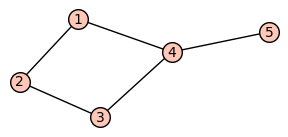

In [66]:
V = [1,2,3,4,5]
E = [(4,1), (1,2), (2,3), (3,4), (4,5)]
g = Graph([V,E])
g.show(figsize=[3,3])

In [67]:
var_a = {(i,j):var('a%s%s'%(i,j)) for i in range(1,6) for j in range(1,6)}
M = matrix([
    [-var_a[3,4], -var_a[4,5], var_a[1,2], 0, 0],
    [-var_a[2,3], 0, var_a[1,4], 0, 0],
    [var_a[1,2], 0, -var_a[3,4], 0, 0],
    [0, var_a[1,1]-var_a[5,5], 0, var_a[1,2], 0],
    [0, var_a[1,2], -var_a[4,5], var_a[2,2]-var_a[5,5], var_a[2,3]]
])
M

[     -a34      -a45       a12         0         0]
[     -a23         0       a14         0         0]
[      a12         0      -a34         0         0]
[        0 a11 - a55         0       a12         0]
[        0       a12      -a45 a22 - a55       a23]

In [68]:
N = matrix([
    [-var_a[3,4], -var_a[4,5], var_a[1,2], 0, 0],
    [0, var_a[1,1]-var_a[5,5], 0, var_a[1,2], 0],
    [0, var_a[1,2], -var_a[4,5], var_a[2,2]-var_a[5,5], var_a[2,3]],
    [0, var_a[1,4], 0, 0, var_a[3,4]],
    [-var_a[1,4], 0, var_a[2,3], 0, -var_a[4,5]]
])
N

[     -a34      -a45       a12         0         0]
[        0 a11 - a55         0       a12         0]
[        0       a12      -a45 a22 - a55       a23]
[        0       a14         0         0       a34]
[     -a14         0       a23         0      -a45]

In [72]:
p = M.determinant()
q = N.determinant()
print("det(M) =")
print(factor(p))
print("det(N) =")
print(factor(q))

det(M) =
-(a12*a14 - a23*a34)*a12*a23*a45
det(N) =
a12^2*a14^2*a23 - a12^3*a14*a34 + a11*a12*a14*a22*a34 - a12*a14*a23^2*a34 + a12^2*a23*a34^2 - a11*a22*a23*a34^2 + 2*a12*a14*a34*a45^2 - a11*a12*a14*a34*a55 - a12*a14*a22*a34*a55 + a11*a23*a34^2*a55 + a22*a23*a34^2*a55 + a12*a14*a34*a55^2 - a23*a34^2*a55^2


### Example 4.2

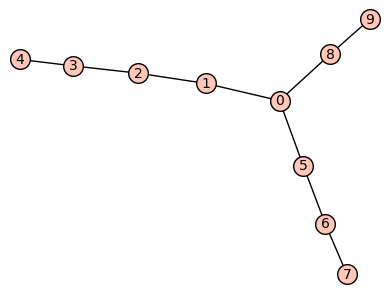

In [10]:
g = Y_graph(4,3,2)
g.show(figsize=[4,4])

In [16]:
forces = Gssp_sequence(g, print_force=True)

Rule 1: {3,4} --> {4,2}
Rule 1: {2,3} --> {3,1}
Rule 1: {1,2} --> {2,0}
Rule 1: {2,4} --> {4,1}
Rule 1: {1,3} --> {3,0}
Rule 1: {1,4} --> {4,0}
Rule 1: {6,7} --> {7,5}
Rule 1: {5,6} --> {6,0}
Rule 1: {5,7} --> {7,0}
Rule 1: {8,9} --> {9,0}
Rule 2: 0 --> [1, 5, 8]
Rule 3: Y_h^(h) --> Y_h^(h+1)
        Y centered at 0 with h = 2
        branch1 [1, 2]
        branch2 [5, 6]
        branch3 [8, 9]
Rule 1: {1,9} --> {9,2}
Rule 1: {2,8} --> {8,3}
Rule 1: {0,3} --> {3,5}
Rule 1: {5,2} --> {2,6}
Rule 1: {6,1} --> {1,7}
Rule 1: {0,7} --> {7,8}
Rule 1: {1,7} --> {7,2}
Rule 1: {2,6} --> {6,3}
Rule 1: {2,7} --> {7,3}
Rule 1: {2,9} --> {9,3}
Rule 1: {3,5} --> {5,4}
Rule 1: {0,4} --> {4,8}
Rule 1: {3,6} --> {6,4}
Rule 1: {3,7} --> {7,4}
Rule 1: {3,9} --> {9,4}
Rule 1: {5,9} --> {9,6}
Rule 1: {6,9} --> {9,7}


### Example 5.4

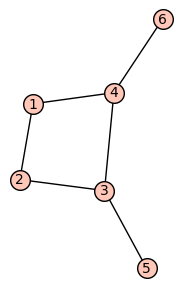

In [118]:
V = [1,2,3,4,5,6]
E = [(1,2), (2,3), (3,4), (4,1), (3,5), (4,6)]
g = Graph([V,E])
g.show(figsize=[3,3])

In [119]:
A98 = matrix([
    [0, 2, 0, 1, 0, 0],
    [2, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0]
])

X98 = matrix([
    [0, 0, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0, -1],
    [0, 1, 0, 0, -1, 0],
    [0, 1, 0, -1, 0, 0],
    [1, 0, -1, 0, 0, 0]
])

n = A98.dimensions()[0]

print("A circ X = 0: %s"%(A98.elementwise_product(X98)==zero_matrix(n)))
print("I circ X = 0: %s"%(identity_matrix(n).elementwise_product(X98)==zero_matrix(n)))
print("[A, X] = 0: %s"%(A98*X98 - X98*A98==zero_matrix(n)))

A circ X = 0: True
I circ X = 0: True
[A, X] = 0: True


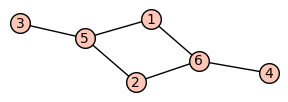

In [121]:
V = [1,2,3,4,5,6]
E = [(1,5), (5,2), (2,6), (6,1), (3,5), (4,6)]
g = Graph([V,E])
g.show(figsize=[3,3])

In [122]:
A99 = matrix([
    [0, 0, 0, 0, -1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [-1, 1, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 0]
])

X99 = matrix([
    [0, 0, 1, -1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [1, 1, 0, -1, 0, 0],
    [-1, 1, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])

n = A99.dimensions()[0]

print("A circ X = 0: %s"%(A99.elementwise_product(X99)==zero_matrix(n)))
print("I circ X = 0: %s"%(identity_matrix(n).elementwise_product(X99)==zero_matrix(n)))
print("[A, X] = 0: %s"%(A99*X99 - X99*A99==zero_matrix(n)))

A circ X = 0: True
I circ X = 0: True
[A, X] = 0: True


In [142]:
### Check if Zsap(g) == 0 or not
### By Theorem 2.6 of 
### J. C.-H. Lin. Using a new zero forcing process to guarantee the Strong Arnold Property. Linear Algebra Appl., 507:229--250, 2016,
### Zsap(g) == 0 implies that g is in Gsap.
find_Zsap(g, oc_rule=True)

True

### Checking unicyclic graphs of order $\leq 6$

In [123]:
### import networkx to access the atlas of graphs
### An Atlas of Graphs by Ronald C. Read and Robin J. Wilson, Oxford University Press, 1998
import networkx.generators.atlas as atlas

In [146]:
h = g.copy()
h.delete_vertex(1)
g.connected_components()

[[1, 2, 3, 4, 5, 6]]

In [148]:
### Define a function 
### to check the conditions of Corollary 2.7
def cor27(g):
    """
    Input:
        g: a unicyclic graph
            (this condition will not be checked)
    Output:
        whether g has a vertex of degree >=4, or 
        g has a vertex of degree >=3 that is not on the cycle
    """
    for v in g.vertices():
        deg = g.degree(v)
        if deg >= 4:
            return True
        elif deg >= 3:
            h = g.copy()
            h.delete_vertex(v)
            ### check if v is on the cycle
            if len(h.connected_components()) == deg:
                return True
    ### when nothing found
    return False

In [149]:
left = []
for i in range(1,209): ### G209 has 7 vertices
    g = Graph(atlas.graph_atlas(i))
    n = g.order()
    if g.size() == n and g.is_connected():
        if Gssp_sequence(g)[0]:
            detect = "In Gssp (Gssp sequence reaches Kn)"
        elif g.is_regular() and g.size() < n*(n-1)/2:
            detect = "Not in Gssp (Regular and not complete)"
        elif cor27(g):
            detect = "Not in Gssp (Cor 2.7 applies)"
        else:
            detect = "Not yet classified"
            left.append(g)
        print("G%s: %s"%(i, detect))

G7: In Gssp (Gssp sequence reaches Kn)
G15: In Gssp (Gssp sequence reaches Kn)
G16: Not in Gssp (Regular and not complete)
G34: Not in Gssp (Cor 2.7 applies)
G35: In Gssp (Gssp sequence reaches Kn)
G36: In Gssp (Gssp sequence reaches Kn)
G37: Not yet classified
G38: Not in Gssp (Regular and not complete)
G92: Not in Gssp (Cor 2.7 applies)
G93: Not in Gssp (Cor 2.7 applies)
G94: Not yet classified
G95: Not in Gssp (Cor 2.7 applies)
G96: Not in Gssp (Cor 2.7 applies)
G97: In Gssp (Gssp sequence reaches Kn)
G98: Not yet classified
G99: Not yet classified
G100: Not in Gssp (Cor 2.7 applies)
G102: In Gssp (Gssp sequence reaches Kn)
G103: Not yet classified
G104: Not yet classified
G105: Not in Gssp (Regular and not complete)


In [151]:
### Recall that 
### G37 is in Example 3.17
### G98 and G99 are in Example 5.4

### The remaining unicyclic graphs are G94, G103, G104

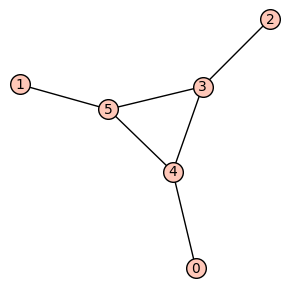

In [153]:
g = Graph(atlas.graph_atlas(94))
g.show(figsize=[3,3])

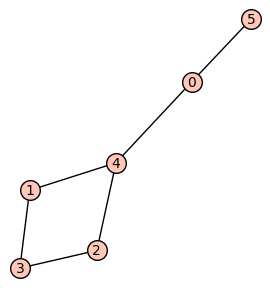

In [157]:
g = Graph(atlas.graph_atlas(103))
g.show(figsize=[3,3])

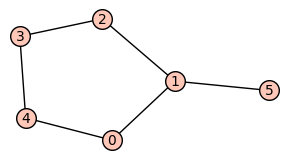

In [158]:
g = Graph(atlas.graph_atlas(104))
g.show(figsize=[3,3])